#Data Analysis on Yelp's business users and users checkin dataset
###Dataset link: https://www.yelp.com/dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Data loading

In [4]:
df=pd.read_json('/content/yelp_academic_dataset_business.json',lines='True')

In [5]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
df.shape

(150346, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


##Stats of the dataset

In [10]:
df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [11]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [12]:
df.drop(['attributes','categories','hours'],axis=1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1
...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1


##Descriptive Statistics of the data

In [13]:
print("Total number of businesses:", df['business_id'].nunique())
print("Average rating:", df['stars'].mean())
print("Average review count:", df['review_count'].mean())

Total number of businesses: 150346
Average rating: 3.5967235576603303
Average review count: 44.86656113232144


##Rating Distrubution

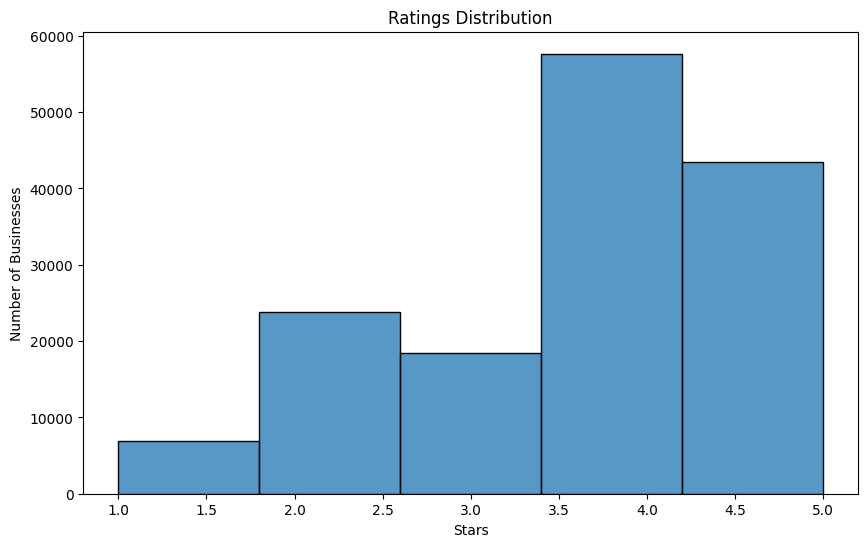

In [14]:
# Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=5, kde=False)
plt.title('Ratings Distribution')
plt.xlabel('Stars')
plt.ylabel('Number of Businesses')
plt.show()


##Review Count Distrubution

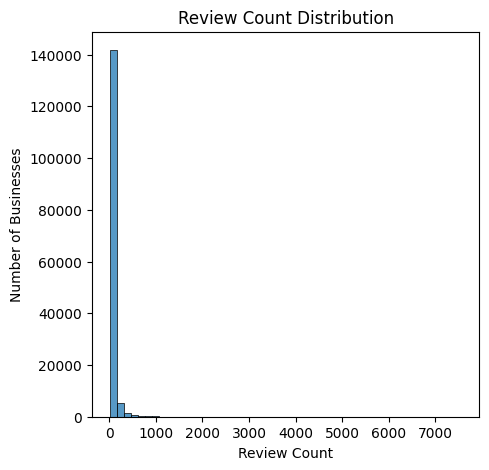

In [16]:
# Review Count Distribution
plt.figure(figsize=(5, 5))
sns.histplot(df['review_count'], bins=50, kde=False)
plt.title('Review Count Distribution')
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')
plt.show()

##Top Cities by Number of Businesses

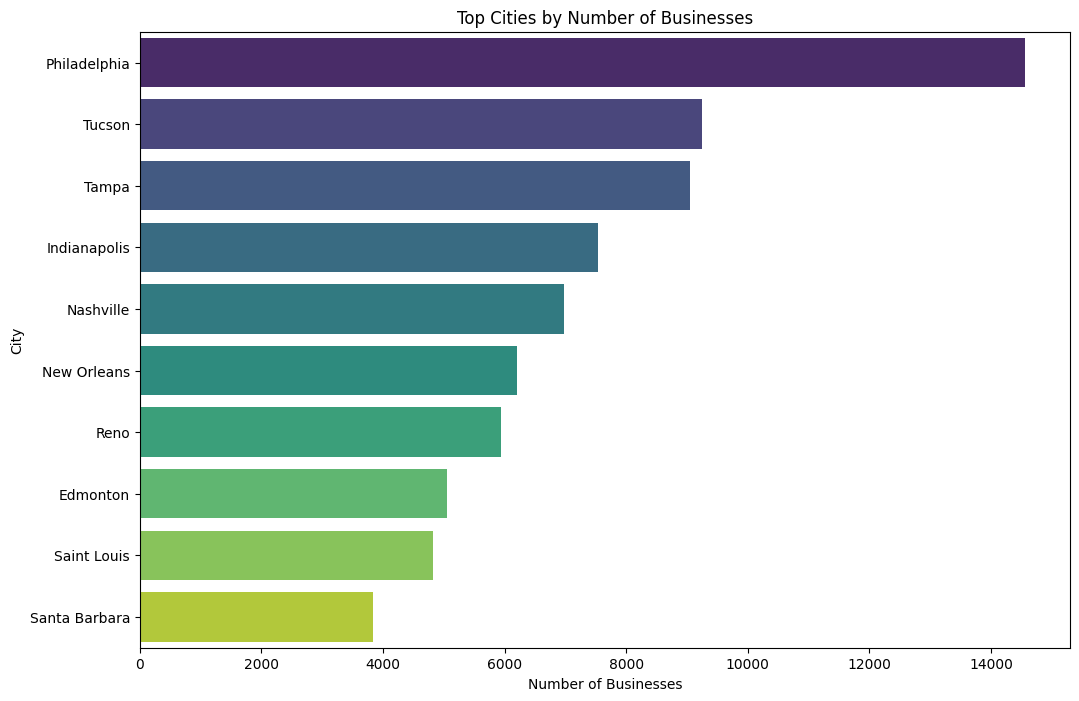

In [17]:
# Top Cities by Number of Businesses
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top Cities by Number of Businesses')
plt.xlabel('Number of Businesses')
plt.ylabel('City')
plt.show()

## Average Rating by City

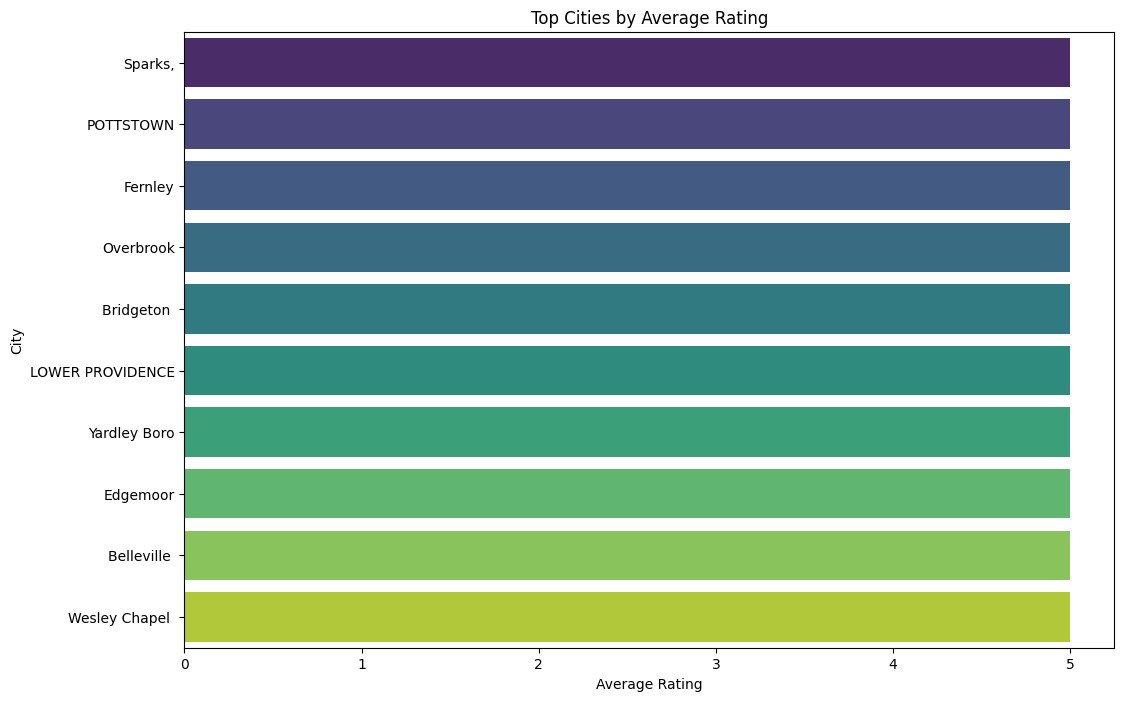

In [18]:
# Average Rating by City
avg_rating_by_city = df.groupby('city')['stars'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_city.index, x=avg_rating_by_city.values, palette='viridis')
plt.title('Top Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

### Top Businesses by Rating

In [19]:
# Top Businesses by Rating
top_businesses = df.nlargest(10, 'stars')[['name', 'stars', 'review_count']]
print("Top 10 Businesses by Rating:\n", top_businesses)

Top 10 Businesses by Rating:
                                 name  stars  review_count
0           Abby Rappoport, LAC, CMQ    5.0             7
13                      Adams Dental    5.0            10
25     Indian Walk Veterinary Center    5.0            15
30  Altitude Trampoline Park - Boise    5.0            30
39                 Sierra Pro Events    5.0             7
42     Stomel Elliot Attorney-At-Law    5.0             5
48                   All In Shipping    5.0             5
49                      Core de Roma    5.0            12
51                    Jennie Deckert    5.0             7
53                 Paws The Cat Cafe    5.0            20


### Correlation between review count and rating

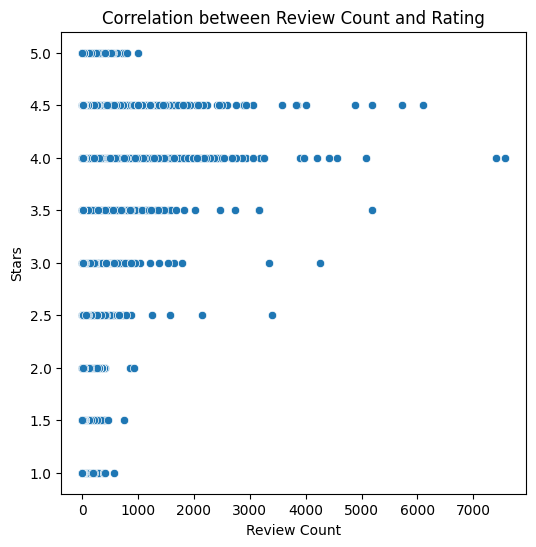

In [21]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='review_count', y='stars')
plt.title('Correlation between Review Count and Rating')
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.show()

# Open vs Closed Businesses

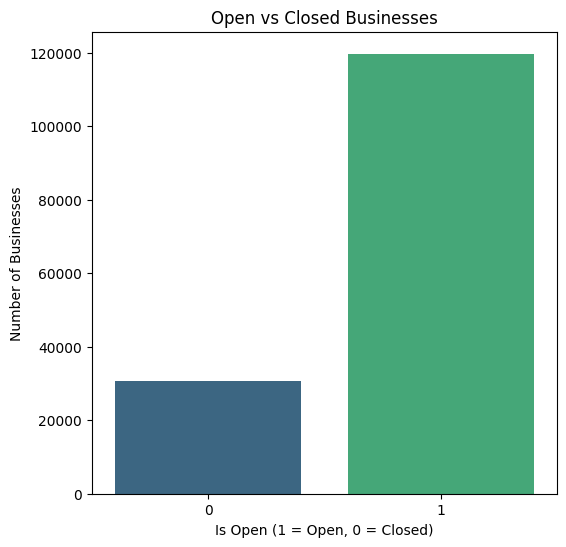

In [22]:
open_closed_counts = df['is_open'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=open_closed_counts.index, y=open_closed_counts.values, palette='viridis')
plt.title('Open vs Closed Businesses')
plt.xlabel('Is Open (1 = Open, 0 = Closed)')
plt.ylabel('Number of Businesses')
plt.show()

In [26]:
checkin_data=pd.read_json("/content/yelp_academic_dataset_checkin.json",lines='True')

In [27]:
checkin_data.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


##Basic Stats

In [28]:
print(checkin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB
None


In [33]:
# Convert the 'date' column to datetime
checkin_data['date'] = pd.to_datetime(checkin_data['date'], errors='coerce')

In [34]:
# Verify the conversion
print(checkin_data.info())
print(checkin_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   business_id  131930 non-null  object        
 1   date         9611 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ MB
None
              business_id date
0  ---kPU91CF4Lq2-WlRu9Lw  NaT
1  --0iUa4sNDFiZFrAdIWhZQ  NaT
2  --30_8IhuyMHbSOcNWd6DQ  NaT
3  --7PUidqRWpRSpXebiyxTg  NaT
4  --7jw19RH9JKXgFohspgQw  NaT


In [35]:
# Check for any unparsed dates
unparsed_dates = checkin_data[checkin_data['date'].isna()]
print(unparsed_dates)

                   business_id date
0       ---kPU91CF4Lq2-WlRu9Lw  NaT
1       --0iUa4sNDFiZFrAdIWhZQ  NaT
2       --30_8IhuyMHbSOcNWd6DQ  NaT
3       --7PUidqRWpRSpXebiyxTg  NaT
4       --7jw19RH9JKXgFohspgQw  NaT
...                        ...  ...
131923  zzjCxn89a7RQo8keIOO_Ag  NaT
131924  zzjFdJwXuxBOGe9JeY_EMw  NaT
131925  zznJox6-nmXlGYNWgTDwQQ  NaT
131927  zzu6_r3DxBJuXcjnOYVdTw  NaT
131928  zzw66H6hVjXQEt0Js3Mo4A  NaT

[122319 rows x 2 columns]


### Daily Check-ins

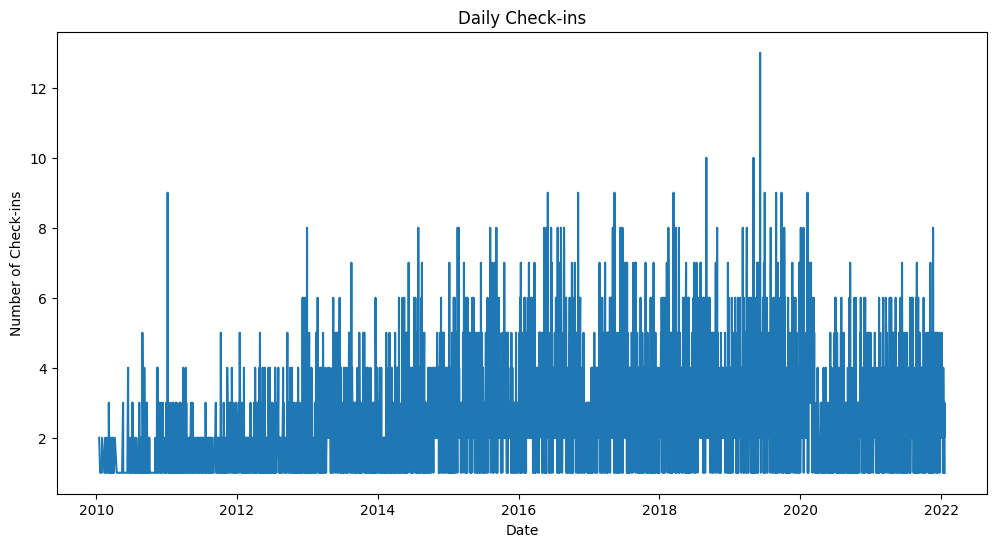

In [36]:
# Daily Check-ins
checkin_data['date_only'] = checkin_data['date'].dt.date
daily_checkins = checkin_data['date_only'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
daily_checkins.plot()
plt.title('Daily Check-ins')
plt.xlabel('Date')
plt.ylabel('Number of Check-ins')
plt.show()

##Weekly Trends

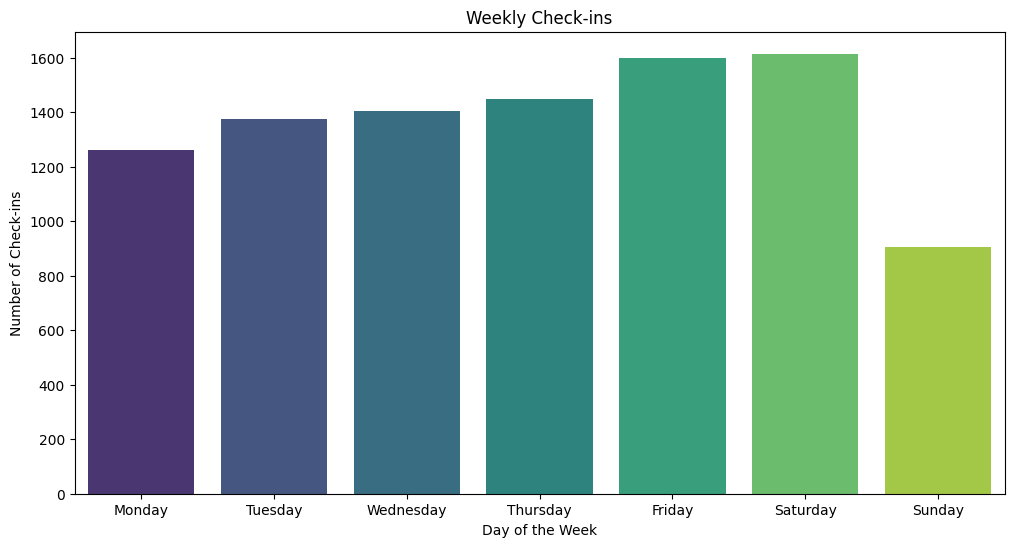

In [37]:
# Weekly Trends
checkin_data['day_of_week'] = checkin_data['date'].dt.day_name()
weekly_checkins = checkin_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_checkins.index, y=weekly_checkins.values, palette='viridis')
plt.title('Weekly Check-ins')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Check-ins')
plt.show()

##Monthly Trends

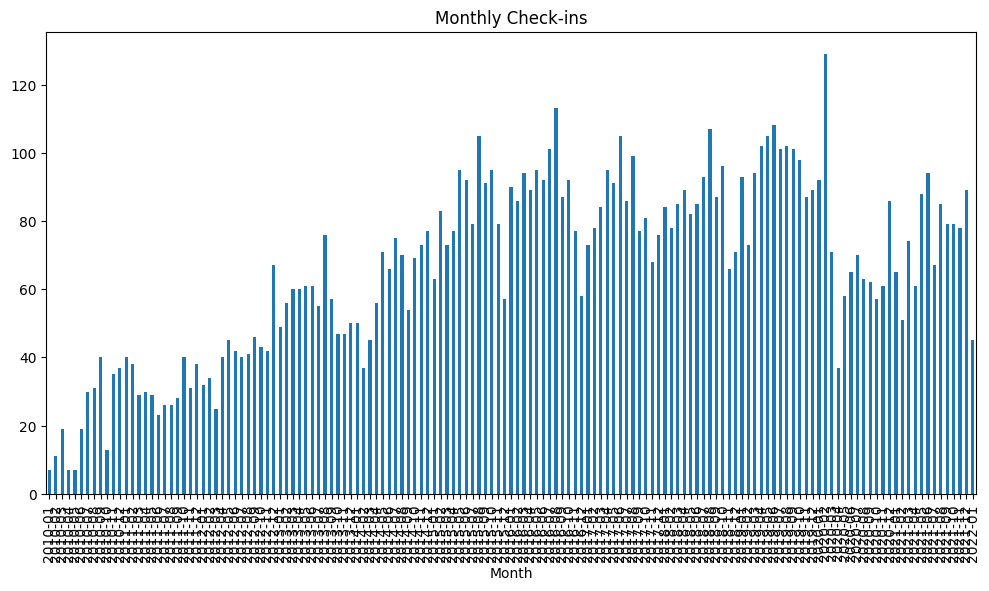

In [39]:
# Monthly Trends
checkin_data['month'] = checkin_data['date'].dt.to_period('M')
monthly_checkins = checkin_data['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_checkins.plot(kind='bar')
plt.title('Monthly Check-ins')
plt.xlabel('Month')
plt.show()


##Hourly Trends

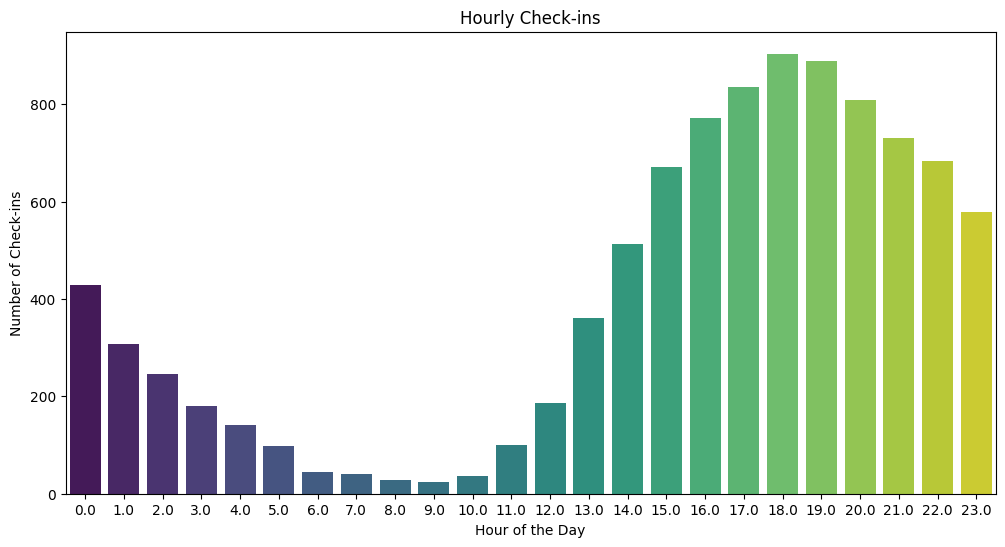

In [40]:
# Hourly Trends
checkin_data['hour'] = checkin_data['date'].dt.hour
hourly_checkins = checkin_data['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_checkins.index, y=hourly_checkins.values, palette='viridis')
plt.title('Hourly Check-ins')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.show()

### Check-ins Per Business

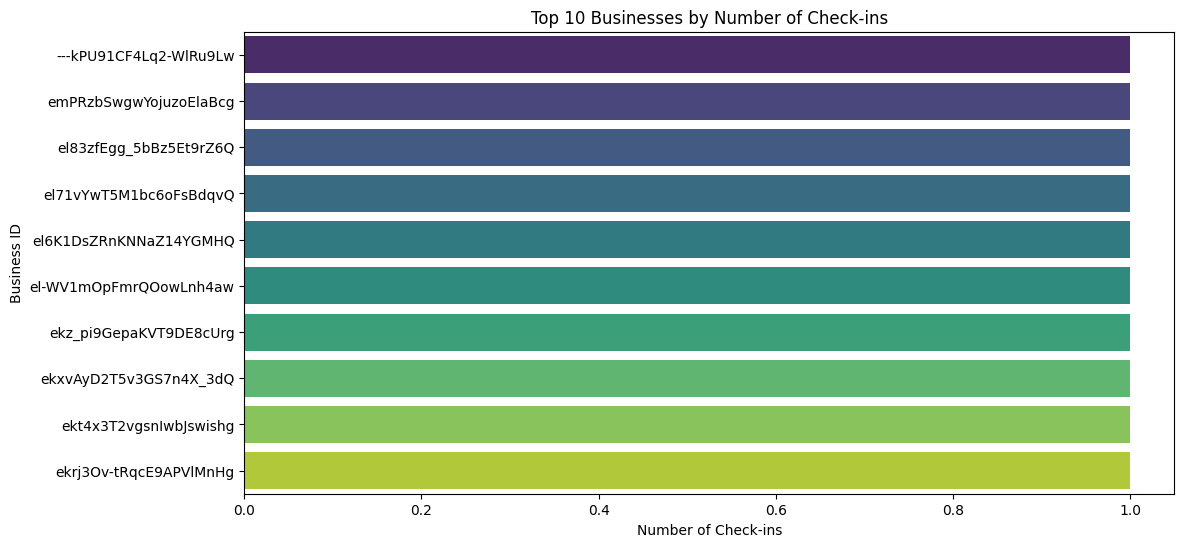

In [41]:
# Check-ins Per Business
checkins_per_business = checkin_data['business_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=checkins_per_business.index, x=checkins_per_business.values, palette='viridis')
plt.title('Top 10 Businesses by Number of Check-ins')
plt.xlabel('Number of Check-ins')
plt.ylabel('Business ID')
plt.show()
